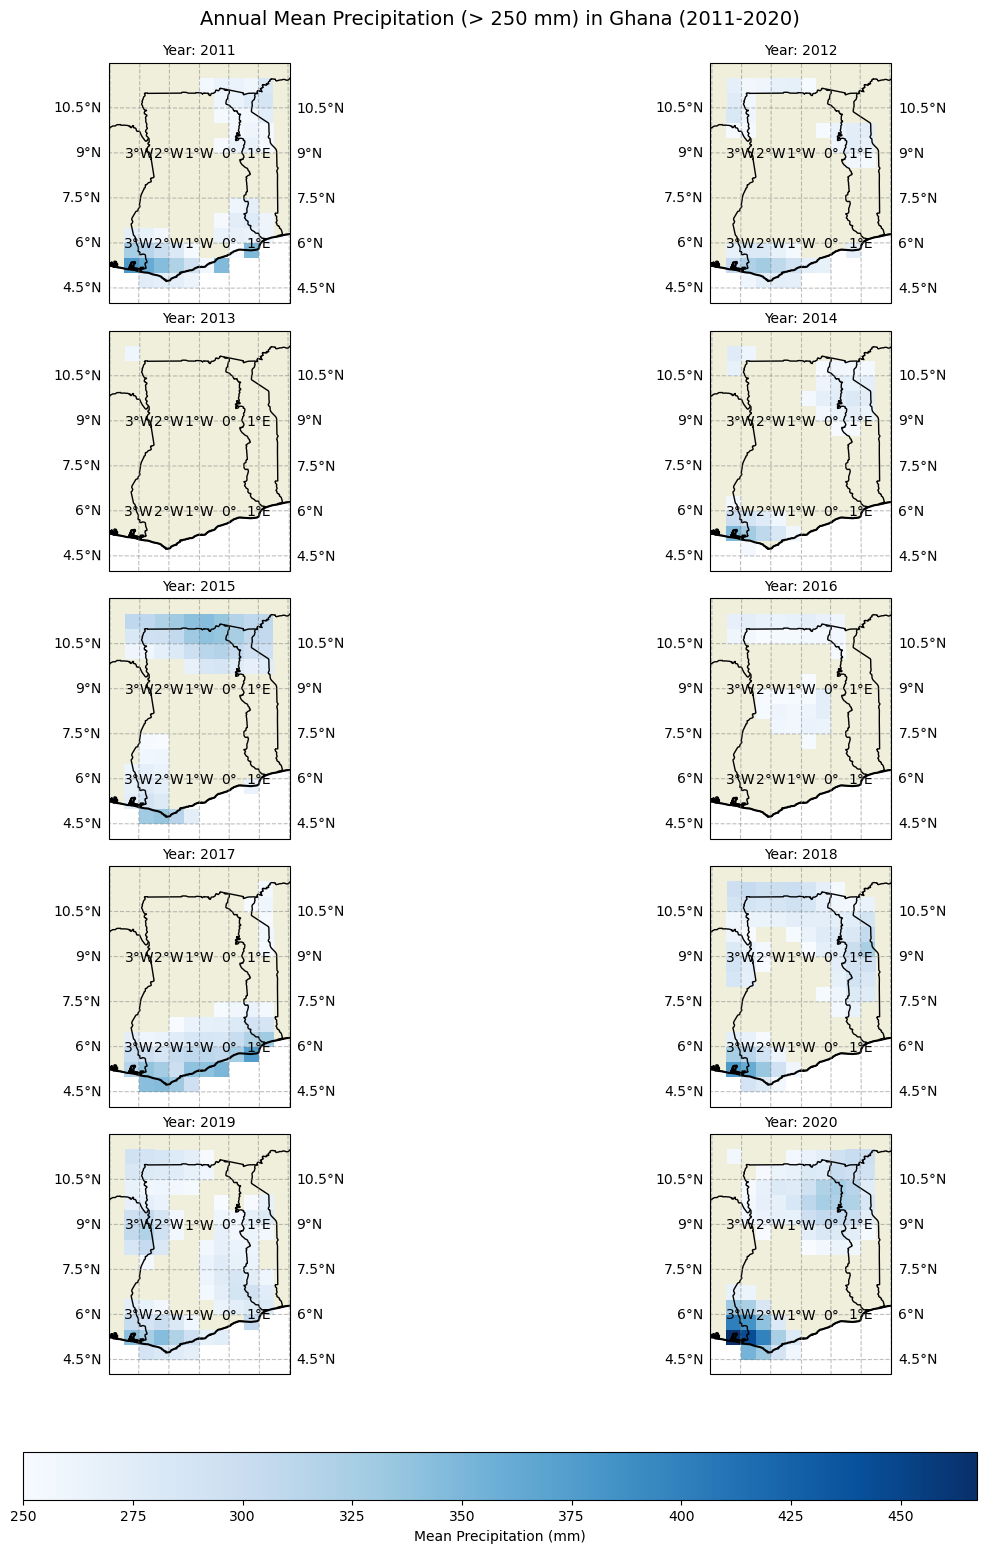

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from warnings import filterwarnings

# Ignore warnings
filterwarnings('ignore')

# Step 1: Load the NetCDF file
da = xr.open_dataset('Africa_cru_data.nc')['pre']

# Step 2: Select Ghana's region and 10 years (2011-2020)
ghana_precip = da.sel(
    lat=slice(4.5, 11.5),  # Ghana's latitude range
    lon=slice(-3.5, 1.5),  # Ghana's longitude range
    time=slice('2011', '2020')  # 10 years
)

# Step 3: Select precipitation values > 250 mm and compute the mean for each year
annual_mean_precip = ghana_precip.where(ghana_precip > 250).groupby('time.year').mean(dim='time')

# Step 4: Set up the map projection (Lambert Conformal)
projection = ccrs.LambertConformal(
    central_longitude=-1.0,  # Center of Ghana
    central_latitude=8.0,    # Center of Ghana
    standard_parallels=(5.0, 10.0)  # Optimize for Ghana's latitude range
)

# Step 5: Create a 10-subplot figure (5 rows, 2 columns)
fig, axes = plt.subplots(
    nrows=5, ncols=2, figsize=(12, 15),
    subplot_kw={'projection': projection},
    constrained_layout=True
)

# Flatten axes for easier iteration
axes = axes.flatten()

# Step 6: Plot each year's mean precipitation
years = annual_mean_precip.year.values  # Get the years (2011-2020)
for i, year in enumerate(years):
    ax = axes[i]
    
    # Plot the mean precipitation for the year
    plot = annual_mean_precip.sel(year=year).plot(
        ax=ax,
        transform=ccrs.PlateCarree(),  # Data is in lat/lon coordinates
        cmap='Blues',  # Colormap for precipitation
        vmin=250, vmax=annual_mean_precip.max(),  # Color scale starting at 250 mm
        add_colorbar=False  # We'll add a common colorbar later
    )
    
    # Set title for each subplot
    ax.set_title(f'Year: {year}', fontsize=10)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
    ax.add_feature(cfeature.BORDERS, linewidth=1.0)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    
    # Set extent to focus on Ghana
    ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
    
    # Add gridlines
    ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)

# Step 7: Add a common colorbar
cbar = fig.colorbar(
    plot, ax=axes, orientation='horizontal', pad=0.05,
    label='Mean Precipitation (mm)', shrink=0.8
)

# Step 8: Add a main title
fig.suptitle('Annual Mean Precipitation (> 250 mm) in Ghana (2011-2020)', fontsize=14, y=1.02)

# Step 9: Show the plot
plt.show()